<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_Derivadas_e_integrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import sympy as sy

## Parte 1

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.0``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L$ es una constante de 0.98 H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.

In [ ]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])

df = pd.DataFrame({'tiempo': t, 'corriente':i})
df

,tiempo,corriente
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [ ]:
#plt.plot(df['tiempo'], df['corriente'])
#plt.show()

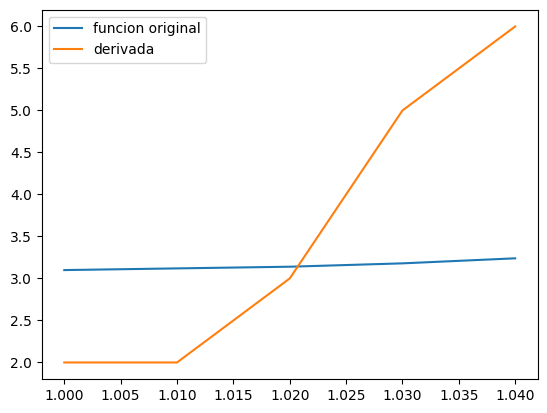

In [ ]:
dt = t[1]- t[0]
derv = np.gradient(i, dt)

plt.plot(t, i, label = 'funcion original')
plt.plot(t, derv, label = 'derivada')
plt.legend()
plt.show()

In [ ]:
L = 0.98
R = 0.142
eps = lambda derv : L*derv + R
eps(derv) # valores aproximados

array([2.102, 2.102, 3.082, 5.042, 6.022])

## Parte 2
1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

1.1 Se define una funcion que hace lo siguiente:

  ° define un n tal que sera el numero de pequeños trapeios en el cual se divide la funcion en sus limites de integracion
  
  ° se define el h que es el ancho de cada interbalo
  
  ° se define I, la cual sera calcula la integral para cada uno de los subinterbalos dada la formula del trapecio. Siguiente se vuelve a redefiner I


2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson.
definir la función f(x) = cos(x) / x^3

definir la función

inicializar a = 1
inicializar b = 1000  // elegir un valor grande para b
inicializar n = 1000  // número de subintervalos (debe ser par)


inicializar integral a 0

para i desde 0 hasta n, con paso de 2:
    calcular integral += simp1_3(f, x[i], x[i+1], x[i+2])




3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [ ]:
import numpy as np
# Regla del trapecio
def int_trap(X, Y):
    n = len(X) - 1
    h = (X[-1] - X[0]) / n
    I = 0.5 * (Y[0] + Y[-1]) + sum(Y[1:n])
    I *= h
    return I

In [ ]:
# con e metodo de trapecio

# 1ra funcion
X = np.linspace(0,np.pi / 2, 1000)
Y = 1 / (np.tan(X)**0.5)
Y[0] = 0 # Quiero evitar error
integral1 = int_trap(X, Y)
# 2da funcion
x = np.linspace(1, 1000,100000)
f = np.cos(x) / (x**3)
integral2 = int_trap(x, f)
integral1, integral2

<ipython-input-7-02901c1a0a3e>:5: RuntimeWarning: divide by zero encountered in divide
  Y = 1 / (np.tan(X)**0.5)


(2.1635209180148203, 0.018138101223553887)

In [ ]:
f = lambda x: np.cos(x) / (x**3)

def simp1_3(f, x0, x1, x2): # (ini,punto Mediio, ultimO)
  return (x2 - x0) * (f(x0) + 4 * f(x1) + f(x2)) / 6
a = 1
b = 1000
n = 10000 # el n debeb ser par

x = np.linspace(a, b, n+1)

integral = 0
for i in range(0, n, 2):# POr que queiro que coja de
  integral += simp1_3(f, x[i], x[i+1], x[i+2])

print(f'resultado de la segunda integral: {integral}')

resultado de la segunda integral: 0.01814766076257941


In [ ]:
ff = lambda x: 1 / (np.tan(x)**0.5)

def simp1_3(f, x0, x1, x2): # (ini,punto Mediio, ultimO)
  return (x2 - x0) * (f(x0) + 4 * f(x1) + f(x2)) / 6
a = 0.001
b = np.pi/2
n = 10000 # el n debeb ser par

x = np.linspace(a, b, n+1)

integral = 0
for i in range(0, n, 2):# POr que queiro que coja de a pares
  integral += simp1_3(ff, x[i], x[i+1], x[i+2])

print(f'resultado de la primera integral: {integral}')

resultado de la primera integral: 2.1581959498428205


# Por el metodo de .quad de scipy

In [ ]:
f = lambda x: np.cos(x) / (x**3)
ff = lambda x: 1 / (np.tan(x)**0.5)

In [ ]:
from scipy.integrate import quad

R1 = quad(ff, 0, np.pi/2, epsabs = 1e-5)
R2 = quad(f, 1, np.inf, epsabs = 1e-5)
R1, R2

((2.221441469079092, 4.861437814085434e-06),
 (0.018117412348155622, 7.237636778095746e-06))

In [ ]:
from scipy.integrate import quad
import scipy.integrate as integrate

# calculndo la donle integral
f_ = lambda x, y: 1 / (1 - y**2)**0.5

# limites de dy
a = 0
b = np.pi/4

#limites de dx
A = lambda x: 0
B = lambda x: np.sin(x)

int2 = integrate.dblquad(f_, a, b,A, B)
int2

(0.36033449485443175, 2.086185191196123e-11)

## Parte 3
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

## Parte 4
The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integral evaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m)
\end{equation}


* $m_1 = 1-m$,

* $ 0 \le m \le1 $

* $\epsilon(m)\leq 3\times 10^{-5}$

* $a_0 = 1.3862944$

* $b_0 = 0.5$

* $a_1 = 0.1119723$

* $b_1 = 0.1213478$

* $a_2 = 0.00725296$

* $b_2 = 0.0288729$

## Parte 5 (Opcional)

Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


In [ ]:
import numpy as np
import scipy as sc
from scipy.integrate import quad

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pylab as plt

f = lambda phi, k : 1/np.sqrt(1-k**2*(np.sin(phi))**2 )
g = lambda phi, k : np.sqrt(1-k**2*(np.sin(phi))**2 )

def KK(k,f):
  I = quad(f, 0, np.pi/2, args=(k, ))[0]
  return I

def EE(k,g):
  I = quad(g, 0, np.pi/2, args=(k, ))[0]
  return I

def k_cuadrado(r,theta,a ):
  n = 4*a*r*np.sin(theta)
  d = a**2+r**2+2*a*r*np.sin(theta)
  return n/d

def Apotencial(r, theta, a, I):
  n = 4*I*a
  d = np.sqrt(a**2+r**2+2*a*r*np.sin(theta))
  PT = n/d
  k_2 = k_cuadrado(r,theta,a )
  k = np.sqrt(k_2)
  ST = (((2-k_2)* KK(k,f)) - 2*EE(k,g))/k_2

  A = PT*ST
  return   A


Text(0, 0.5, 'A(r, θ)')

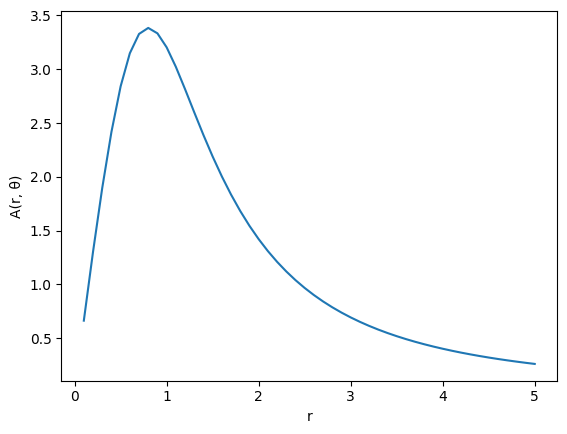

In [ ]:
a=1
I=3
r=np.linspace(0.1, 5.0)
A = np.zeros(len(r))
for i, r_  in enumerate(r):
  A[i] = Apotencial(r_, np.pi/4, a, I)

plt.plot(r,A)
plt.xlabel("r")
plt.ylabel("A(r, θ)")